# Handwritten digit classification using Tensorflow

In [ ]:
#Importing the libraries

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
#Loading the hand written digit dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() 

In [31]:
#y-train values

y_train[1:5]

array([0, 4, 1, 9], dtype=uint8)

In [32]:
#X Train array

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

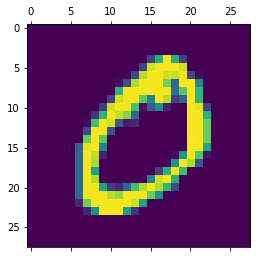

In [33]:
#Displaying the first Image

plt.matshow(X_train[0])

In [34]:
#Scaling the values by dividing the array by 255
#Improves Accuracy

X_train = X_train / 255
X_test = X_test / 255

In [35]:
#Flattening the array for neural network
#You can use Keras's Flatten Function as well

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [36]:
#Shape of X_Train after flattening

X_train_flattened.shape

(60000, 784)

### Training the model without any Hidden Layer

In [37]:
#Training the model

model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,), activation = 'sigmoid')
]
)

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.4753 - accuracy: 0.8728
Epoch 2/5
1875/1875 [==============================] - 2s 865us/step - loss: 0.3040 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 867us/step - loss: 0.2833 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 886us/step - loss: 0.2733 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.2664 - accuracy: 0.9255


In [39]:
#Evaluating accuracy on test dataset

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 755us/step - loss: 0.2642 - accuracy: 0.9266


[0.2641782760620117, 0.9265999794006348]

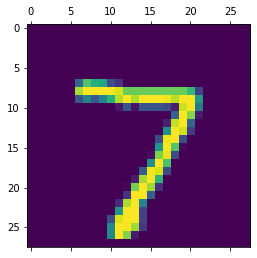

In [40]:
#First Image

plt.matshow(X_test[0])

In [43]:
#First Image Prediction

predictions = model.predict(X_test_flattened)
np.argmax(predictions[0])

7

In [44]:
y_predicted_labels = [np.argmax(i) for i in predictions]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
#Confusion Matrix

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    6,    3,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    9,  924,   21,    8,    3,   11,   10,   36,    4],
       [   4,    0,   16,  928,    0,   21,    2,   12,   20,    7],
       [   1,    1,    5,    1,  923,    0,    9,    3,    9,   30],
       [   8,    3,    3,   38,   11,  772,   13,    6,   32,    6],
       [  11,    3,    6,    1,    7,   10,  915,    2,    3,    0],
       [   1,    6,   21,    8,    9,    0,    0,  944,    1,   38],
       [   5,    7,    7,   24,    9,   21,    8,   11,  875,    7],
       [  10,    7,    1,   10,   31,    7,    0,   22,    7,  914]])>

Text(69.0, 0.5, 'Actual Value')

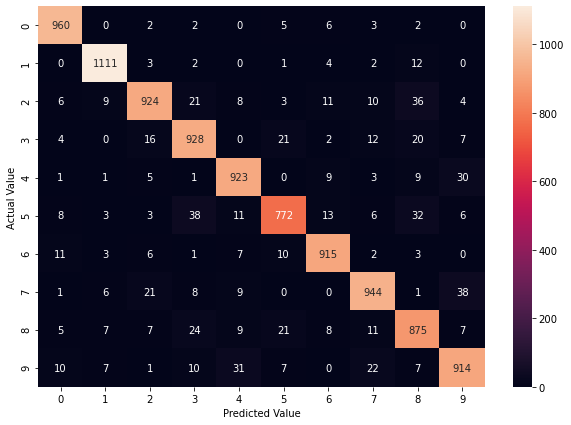

In [47]:
#Printing the details of the confusion Matrix

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [62]:
#Adding hidden layer into the model

model1 = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model1.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.2779 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 2s 914us/step - loss: 0.1241 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 2s 923us/step - loss: 0.0858 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.0657 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 2s 923us/step - loss: 0.0533 - accuracy: 0.9834


In [63]:
#Evaluating performance on the test set with hidden layer

model1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 860us/step - loss: 0.0827 - accuracy: 0.9747


[0.08268646150827408, 0.9746999740600586]

In [64]:
#Predictions with new model1 with hidden layer

predictions = model1.predict(X_test_flattened)
y_predicted_labels_model1 = [np.argmax(i) for i in predictions]
y_predicted_labels_model1[:5]

[7, 2, 1, 0, 4]

Text(69.0, 0.5, 'Actual Value')

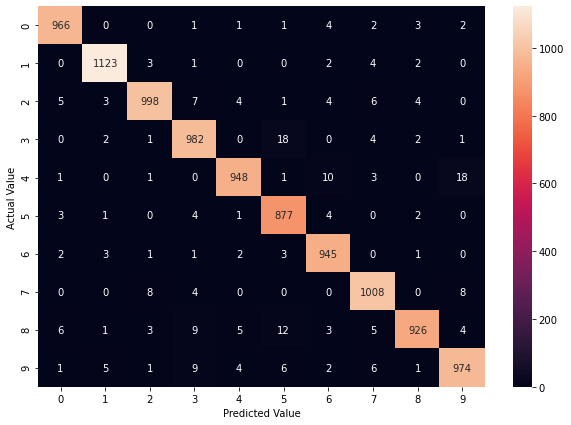

In [65]:
#Printing the details of the confusion matrix after the hidden layer

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels_model1)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')



In [66]:
#Keras Flattened Function

#Adding hidden layer into the model

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

model1.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.2700 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 2s 948us/step - loss: 0.1219 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 2s 943us/step - loss: 0.0848 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 2s 949us/step - loss: 0.0632 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 2s 945us/step - loss: 0.0505 - accuracy: 0.9842
